# Portfolio Simulation -- S&P 500, T-Bills, Gold -- a Portfolio of Two Assets
## Mahbub_Faiz_Project_3251_April 2018
### Submitted to: Mr. Rodolfo Rivas, Course Teacher, University of Toronto

In [15]:
import pandas as pd
from pandas_datareader import data
import matplotlib.pyplot as plt
import datetime as datetime
from numpy import *
%matplotlib inline

In [16]:
#Data & Scraping for S&P 500 collected from IBM Big Data University Source. 
start_date = datetime.date(1976,1,1)
end_date = datetime.date(2017,1,1)

# Downloading S&P 500 index data
try:
    SnP500_Ddata = web.DataReader('^GSPC','yahoo',start_date,end_date)
except:
    SnP500_Ddata = pd.read_csv("http://analytics.romanko.ca/data/SP500_hist.csv")
    SnP500_Ddata.index = pd.to_datetime(SnP500_Ddata.Date)
SnP500_Ddata.head()

,Date,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,,
1976-01-02,1976-01-02,90.190002,91.180000,89.809998,90.900002,90.900002,10300000
1976-01-05,1976-01-05,90.900002,92.839996,90.849998,92.580002,92.580002,21960000
1976-01-06,1976-01-06,92.580002,94.180000,92.370003,93.529999,93.529999,31270000
1976-01-07,1976-01-07,93.529999,95.150002,92.910004,93.949997,93.949997,33170000
1976-01-08,1976-01-08,93.949997,95.470001,93.410004,94.580002,94.580002,29030000


In [17]:
#Transforming Daily Data to Annual Data
SnP500_Adata = SnP500_Ddata.resample('A').last()
SnP500_Adata[['Volume','Adj Close']].tail()

,Volume,Adj Close
Date,,
2012-12-31,3204330000,1426.189941
2013-12-31,2312840000,1848.359985
2014-12-31,2606070000,2058.899902
2015-12-31,2655330000,2043.939941
2016-12-31,2670900000,2238.830078


In [127]:
#Caculating the Return of S&P 500 Index
SnP500_Adata[['Adj Close']] = SnP500_Adata[['Adj Close']].apply(pd.to_numeric, errors='ignore')
SnP500_Adata['returns'] = SnP500_Adata['Adj Close'] / SnP500_Adata['Adj Close'].shift(1) -1
SnP500_Adata = SnP500_Adata.dropna()
print SnP500_Adata['returns']

Date
1982-12-31    0.147613
1983-12-31    0.172710
1984-12-31    0.014006
1985-12-31    0.263334
1986-12-31    0.146204
1987-12-31    0.020275
1988-12-31    0.124008
1989-12-31    0.272505
1990-12-31   -0.065591
1991-12-31    0.263067
1992-12-31    0.044643
1993-12-31    0.070552
1994-12-31   -0.015393
1995-12-31    0.341107
1996-12-31    0.202637
1997-12-31    0.310082
1998-12-31    0.266686
1999-12-31    0.195260
2000-12-31   -0.101392
2001-12-31   -0.130427
2002-12-31   -0.233660
2003-12-31    0.263804
2004-12-31    0.089935
2005-12-31    0.030010
2006-12-31    0.136194
2007-12-31    0.035296
2008-12-31   -0.384858
2009-12-31    0.234542
2010-12-31    0.127827
2011-12-31   -0.000032
2012-12-31    0.134057
2013-12-31    0.296012
2014-12-31    0.113906
2015-12-31   -0.007266
2016-12-31    0.095350
Freq: A-DEC, Name: returns, dtype: float64


In [19]:
#Computing average annual return and standard deviation of return for S&P 500 index: (Price1-Price0)/Price0;

SnP500_mean_ret = float(SnP500_Adata[['returns']].mean())
SnP500_std_ret = float(SnP500_Adata[['returns']].std())
print ("S&P 500 average return = %g%%, st. dev  = %g%%") % (100*SnP500_mean_ret, 100*SnP500_std_ret)


S&P 500 average return = 9.13031%, st. dev  = 15.8073%


# Scenario 1: Invest \$5000 in the US stock market for 1 year: $PV_0 = 5000$

In [20]:
# In our example we assume that the return of the market over the next year follow Normal distribution.
# Between 1977 and 2014, S&P 500 returned 9.38% per year on average with a standard deviation of 16.15%.
# We want to generate 100 scenarios for the market return over the next year i.e.
# By drawing 100 random numbers from a Normal Distribution with mean 9.38% and standard deviation of 16.15%):


In [21]:
Ns = 100 # Number of scenarios
r01 = random.normal(SnP500_mean_ret, SnP500_std_ret, Ns)
r01

array([  1.41522188e-01,   1.30828197e-01,   2.91323641e-02,
        -1.69250066e-01,  -8.56954954e-02,   2.69709687e-02,
         1.28345573e-01,  -1.01820081e-01,   1.19314889e-01,
         2.16892735e-02,  -9.22931886e-02,   1.27263405e-01,
        -1.70491056e-02,   7.60390093e-02,  -5.65077037e-02,
         2.26999834e-01,  -8.64049119e-03,  -4.05093029e-02,
        -5.83326684e-02,   6.02685367e-03,   2.21904331e-01,
         1.41672951e-01,  -2.33460634e-04,   2.67422495e-02,
         1.20604509e-01,  -4.03414248e-02,   4.32371910e-01,
         1.28552609e-01,   2.09134886e-01,   1.03353673e-01,
        -5.50990933e-02,   1.52800780e-01,   3.41950387e-01,
        -4.07528082e-02,   8.56190025e-02,  -1.31541835e-01,
        -6.66465839e-02,   1.14556517e-01,   2.01834768e-02,
        -4.56813153e-03,   7.94691250e-02,  -3.60597058e-02,
         5.03666563e-02,  -4.36532450e-02,   1.23582996e-01,
        -5.12382306e-02,   5.69743818e-02,  -1.52216116e-01,
         5.41570665e-02,

In [22]:
pv0 = 5000 # Initial capital

# Distribution of Value of investment at the end of year 1:
v1 = (r01 + 1) * pv0
v1

array([ 5707.61093997,  5654.14098742,  5145.6618204 ,  4153.74966782,
        4571.52252314,  5134.85484364,  5641.7278643 ,  4490.89959554,
        5596.57444514,  5108.44636747,  4538.53405716,  5636.31702337,
        4914.75447191,  5380.19504634,  4717.46148127,  6134.9991708 ,
        4956.79754403,  4797.45348562,  4708.33665799,  5030.13426837,
        6109.52165392,  5708.36475443,  4998.83269683,  5133.71124753,
        5603.02254475,  4798.29287595,  7161.85954866,  5642.7630426 ,
        6045.67443078,  5516.76836627,  4724.50453354,  5764.00389767,
        6709.75193305,  4796.23595913,  5428.09501261,  4342.29082323,
        4666.76708073,  5572.78258267,  5100.91738386,  4977.15934233,
        5397.34562484,  4819.70147081,  5251.83328148,  4781.73377519,
        5617.91497842,  4743.80884714,  5284.87190899,  4238.91942083,
        5270.78533254,  5759.91677109,  5481.93826801,  4199.40697265,
        7578.75676478,  4245.94281588,  5228.42062005,  4579.10843567,
      

In [23]:
mean(v1), min(v1), max(v1), std(v1)

(5300.6014881697229,
 3820.1139956745183,
 7578.7567647770211,
 732.62288357835507)

In [24]:
percentile(v1, [5, 50,95])

array([ 4245.63756869,  5176.58078512,  6519.50978839])

In [25]:
#Are we willing to risk a 5% chance of ending up with a stock worth less than $3820, in order to chase 
#an expected return of around 9%, giving us an expected stock price of around $5300?”

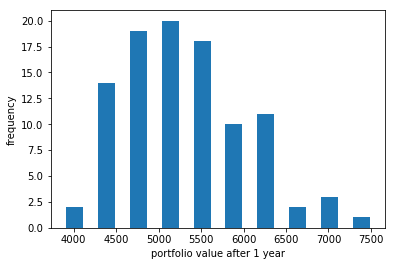

In [26]:
hist, bins = histogram(v1)
positions = (bins[:-1] + bins[1:]) / 2
plt.bar(positions, hist, width=200)
plt.xlabel('portfolio value after 1 year')
plt.ylabel('frequency')
plt.show()

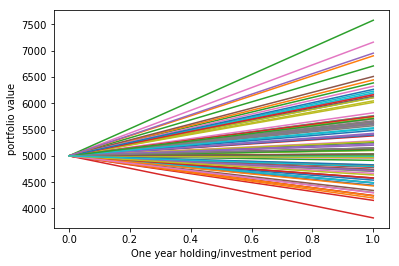

In [27]:
# Plot simulated paths over time (Only invested for a year of return)
for res in v1:
    plt.plot((0,1), (pv0, res))
plt.xlabel('One year holding/investment period')
plt.ylabel('portfolio value')
plt.show()

# Scenario 2: Invest $5000 in the US stock market for 30 years: v0=5000

In [28]:
# Let's invest in the market for the next 30 years (instead of only the next one year as in Scenario 1).

# We assume that every year our investment returns from investing into the S&P 500 will follow a Normal distribution with the mean and standard deviation as in the above example.

# the initial capital of \$5000

In [29]:
pv0 = 5000 # Initial capital
r_speriod30  = random.normal(SnP500_mean_ret, SnP500_std_ret, (Ns, 30))
r_speriod30

array([[ 0.01277507, -0.17514907, -0.01215164, ...,  0.11689281,
         0.06733209, -0.03051366],
       [-0.13290895,  0.19923194,  0.15888159, ...,  0.12472944,
         0.02667457,  0.19580535],
       [ 0.32369827,  0.24176205,  0.10215667, ...,  0.28049053,
         0.41930454,  0.22785633],
       ..., 
       [-0.18276607,  0.17322412,  0.17587544, ...,  0.13406477,
        -0.13119033, -0.06845624],
       [ 0.03953667, -0.00998883,  0.08808964, ...,  0.07626179,
        -0.13721118,  0.08161584],
       [-0.21762957, -0.10747231,  0.16465765, ..., -0.05655194,
         0.04008497,  0.09795276]])

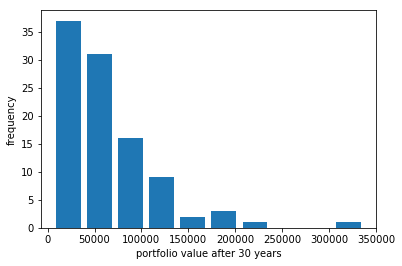

In [32]:
v30 = prod(1 + r_speriod30 , 1) * pv0

hist, bins = histogram(v30)
positions = (bins[:-1] + bins[1:]) / 2
width = (bins[1] - bins[0]) * 0.8
plt.bar(positions, hist, width=width)
plt.xlabel('portfolio value after 30 years')
plt.ylabel('frequency')
plt.show()

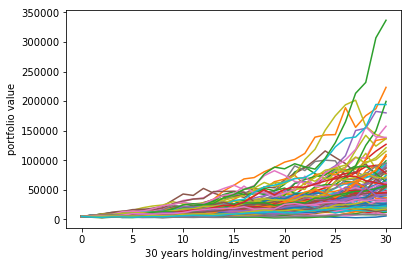

In [33]:
for scenario in r_speriod30:
    y = [prod(1 + scenario[0:i]) * pv0 for i in range(0,31)]
    plt.plot(range(0,31), y)
plt.xlabel('30 years holding/investment period')
plt.ylabel('portfolio value')
plt.show()

In [267]:
mean(v30), min(v30), max(v30), std(v30)

(43886.034446588048,
 9252.2646769823496,
 367165.88066754304,
 32060.832383623692)

In [266]:
percentile(v30, [5, 50,95])

array([  15420.34781784,   34709.15778442,  105697.23290659])

# Scenario 3: Invest $5000 in the US Treasury Bills for 30 years: v0=5000

In [34]:
# Downloading 3-month T-bill rates from Federal Reserve
start_date_b = datetime.date(1977,1,1)
end_date_b = datetime.date(2017,1,1)
TBill_Ddata = data.DataReader('DTB3','fred',start_date_b,end_date_b)
TBill_Ddata.head()

,DTB3
DATE,
1977-01-03,4.39
1977-01-04,4.49
1977-01-05,4.47
1977-01-06,4.50
1977-01-07,4.62


In [35]:
# Creating a time-series of annual data points from daily data
TBill_Adata = TBill_Ddata.resample('A').last()
TBill_Adata[['DTB3']].tail()

,DTB3
DATE,
2012-12-31,0.05
2013-12-31,0.07
2014-12-31,0.04
2015-12-31,0.16
2016-12-31,0.50


In [36]:
#Computing annual return for bonds:
TBill_Adata['returns'] = TBill_Adata['DTB3'] / 100
TBill_Adata = TBill_Adata.dropna()
print TBill_Adata['returns']

DATE
1977-12-31    0.0613
1978-12-31    0.0926
1979-12-31    0.1204
1980-12-31    0.1430
1981-12-31    0.1108
1982-12-31    0.0792
1983-12-31    0.0897
1984-12-31    0.0785
1985-12-31    0.0705
1986-12-31    0.0567
1987-12-31    0.0568
1988-12-31    0.0810
1989-12-31    0.0755
1990-12-31    0.0644
1991-12-31    0.0388
1992-12-31    0.0308
1993-12-31    0.0301
1994-12-31    0.0553
1995-12-31    0.0496
1996-12-31    0.0507
1997-12-31    0.0522
1998-12-31    0.0437
1999-12-31    0.0517
2000-12-31    0.0573
2001-12-31    0.0171
2002-12-31    0.0120
2003-12-31    0.0093
2004-12-31    0.0218
2005-12-31    0.0399
2006-12-31    0.0489
2007-12-31    0.0329
2008-12-31    0.0011
2009-12-31    0.0006
2010-12-31    0.0012
2011-12-31    0.0002
2012-12-31    0.0005
2013-12-31    0.0007
2014-12-31    0.0004
2015-12-31    0.0016
2016-12-31    0.0050
Freq: A-DEC, Name: returns, dtype: float64


In [37]:
# Computing average annual return and standard deviation of return for bonds:
TBill_mean_ret = float(TBill_Adata[['returns']].mean())
TBill_std_ret = float(TBill_Adata[['returns']].std())
print ("T-bill average return = %g%%, st. dev  = %g%%") % (100*TBill_mean_ret, 100*TBill_std_ret)

T-bill average return = 4.5845%, st. dev  = 3.64866%


In [268]:
percentile(TBill_Adata[['returns']], [5, 50,95])

array([ 0.000495,  0.04925 ,  0.11128 ])

# Scenario 3: Make a x% Stocks - y% T-Bills Portfolio

In [38]:
#Computing Covariance matrix:
covMat = cov(array(SnP500_Adata[['returns']]),array(TBill_Adata[['returns']]),rowvar=0)
covMat

array([[ 0.024987  ,  0.00080272],
       [ 0.00080272,  0.00133127]])

In [39]:
#Simulating the two-assets Portfolio for 5000 Scenarios: 50-50 Weights in Stocks & Government T-Bills

v0 = 5000 # Initial capital
Ns = 2000 # Number of scenarios

In [40]:
Port_Return2Assets= [SnP500_mean_ret, TBill_mean_ret] # Expected return
Port_Return2Assets

[0.09130311413356888, 0.04584499999999999]

In [41]:
stockRet = ones(Ns)
bondsRet = ones(Ns)

In [42]:
scenarios = random.multivariate_normal(Port_Return2Assets, covMat, Ns)
for year in range(1, 31):
    scenarios = random.multivariate_normal(Port_Return2Assets, covMat, Ns)
    stockRet *= (1 + scenarios[:,0])
    bondsRet *= (1 + scenarios[:,1])

In [43]:
v30 = 0.5 * v0 * stockRet + 0.5 * v0 * bondsRet

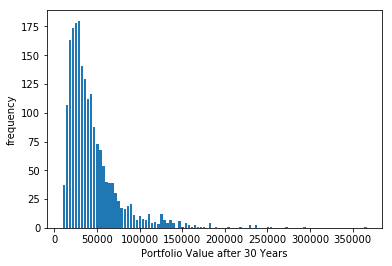

In [44]:
hist, bins = histogram(v30, bins = 100)
positions = (bins[:-1] + bins[1:]) / 2
width = (bins[1] - bins[0]) * 0.8
plt.bar(positions, hist, width=width)
plt.xlabel('Portfolio Value after 30 Years')
plt.ylabel('frequency')
plt.show()

In [45]:
# Compute portfolio returns by iterating through different combinations of weights
v30comp = []
for w in arange(0.2, 1.01, 0.2):
    v30comp += [w * pv0 * stockRet + (1 - w) * pv0 * bondsRet]
#    v30comp[0]=20% Stock & 80% T-Bills -- Strategy 1
#    v30comp[1]=40% Stock & 60% T-Bills -- Strategy 2
#    v30comp[2]=60% Stock & 40% T-Bills -- Strategy 3
#    v30comp[3]=80% Stock & 20% T-Bills -- Strategy 4

In [46]:
# Find the differences in outcomes for v30
# (e.g.: Stratery 4 - Strategy 1)
v30d = v30comp[3] - v30comp[0]

In [262]:
# Deriving number of elements in v30d that are > 0 and < 0 and compare

pos_count = (v30d > 0).sum()
neg_count = (v30d <= 0).sum()

print u"""Strategy 4 was better in %d cases 
Strategy 1 was better in %d cases
Difference = %d""" % (pos_count, neg_count, pos_count - neg_count)

Strategy 4 was better in 1752 cases 
Strategy 1 was better in 248 cases
Difference = 1504


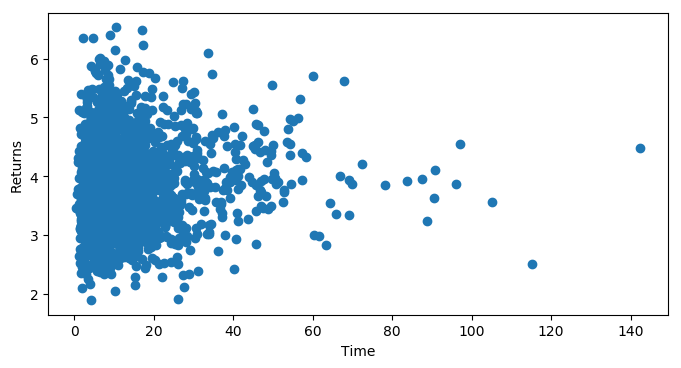

In [50]:
plt.figure(figsize=(8,4),dpi=100)
plt.scatter(stockRet,bondsRet)
plt.xlabel('Time')
plt.ylabel('Returns')

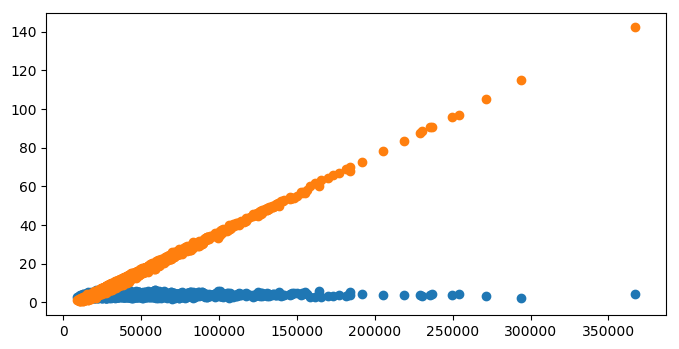

In [72]:
plt.figure(figsize=(8,4),dpi=100)
plt.scatter(v30,bondsRet)
plt.scatter(v30,stockRet)

# Include Physical Gold in the Portfolio instead of T-Bills?

In [110]:
Golddf = pd.read_excel('GoldPrices.xls', sheetname='Annual')
Golddf1 = Golddf[['Date','USD']]
Golddf1

,Date,USD
0,1978,226.00
1,1979,512.00
2,1980,589.75
3,1981,397.50
4,1982,456.90
5,1983,382.40
6,1984,308.30
7,1985,326.80
8,1986,388.75
9,1987,484.10


In [171]:
Golddf1['returns'] = Golddf1['USD'] / Golddf1['USD'].shift(1) -1
Golddf1 = Golddf1.dropna()
GoldRet=Golddf1['returns']
print GoldRet

3    -0.325986
4     0.149434
5    -0.163055
6    -0.193776
7     0.060006
8     0.189565
9     0.245273
10   -0.152551
11   -0.028397
12   -0.031109
13   -0.085577
14   -0.057341
15    0.176780
16   -0.021698
17    0.009785
18   -0.045866
19   -0.214083
20   -0.008270
21    0.008513
22   -0.054436
23    0.007469
24    0.255696
25    0.198877
26    0.046486
27    0.177686
28    0.231969
29    0.319225
30    0.043178
31    0.250359
32    0.292414
33    0.089292
34    0.082626
35   -0.273303
36    0.001245
37   -0.121061
38    0.081038
39    0.126625
Name: returns, dtype: float64


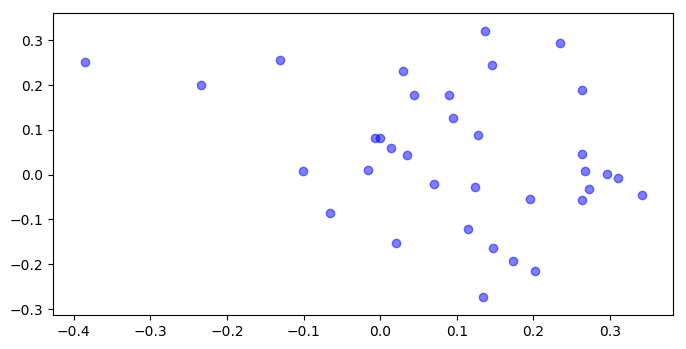

In [137]:
#plt.figure(figsize=(8,4),dpi=100)
#plt.scatter(,color=red,blue, alpha=0.2)
#fig, ax = plt.subplots()
#ax.scatter(SnP500_Adata['returns'], color="blue", alpha=0.2)
#ax.scatter(GoldRet[4:], color="red", alpha=0.2)
plt.figure(figsize=(8,4),dpi=100)
plt.scatter(SnP500_Adata['returns'],GoldRet[4:],alpha=0.5, color='blue')
#plt.xlabel('x')
#plt.ylabel('y')
#plt.title('Scatter Plot y vs. y')
plt.show()
#Returns are diversified or More dispersed!

In [269]:
mean(GoldRet), min(GoldRet), max(GoldRet), std(GoldRet)

(0.034244149601134734,
 -0.32598558711318359,
 0.31922468354430378,
 0.15928834133157194)

In [271]:
percentile(GoldRet, [5, 50,95])

array([-0.22592671,  0.00978474,  0.26303972])

In [182]:
#Simulating the two-assets Portfolio for 5000 Scenarios: 50-50 Weights in Stocks & Gold

Altv0 = 5000 # Initial capital
AltNs = 2000 # Number of scenarios
stockRet = ones(Ns)
GRet = ones(Ns)
SnP500_mean_ret = float(SnP500_Adata[['returns']].mean())
Gold_mean_ret = float(GoldRet.mean())
Alt_Port_Return=[SnP500_mean_ret,Gold_mean_ret]
Alt_Port_Return #Expected Return

[0.09922868143885523, 0.034244149601134734]

In [257]:
#Computing Covariance matrix GOld & S&P 500:

AltcovMat = cov(array(SnP500_Adata[['returns']]),array(GoldRet[2:37]),rowvar=0)
AltcovMat

array([[ 0.02526273, -0.00758139],
       [-0.00758139,  0.02335421]])

In [258]:
scenarios = random.multivariate_normal(Alt_Port_Return, AltcovMat, AltNs)
for year in range(1, 31):
    scenarios = random.multivariate_normal(Alt_Port_Return, AltcovMat, AltNs)
    stockRet *= (1 + scenarios[:,0])
    GRet *= (1 + scenarios[:,1])

In [259]:
Altv30 = 0.5 * Altv0 * stockRet + 0.5 * Altv0 * GRet

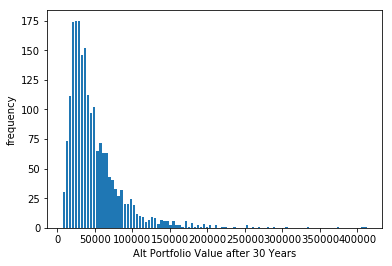

In [260]:
hist, bins = histogram(Altv30, bins = 100)
positions = (bins[:-1] + bins[1:]) / 2
width = (bins[1] - bins[0]) * 0.8
plt.bar(positions, hist, width=width)
plt.xlabel('Alt Portfolio Value after 30 Years')
plt.ylabel('frequency')
plt.show()

In [261]:
# Compute portfolio returns by iterating through different combinations of weights
Altv30comp = []
for w in arange(0.2, 1.01, 0.2):
    Altv30comp += [w * Altv0 * stockRet + (1 - w) * Altv0 * GRet]
#    Altv30comp[0]=20% Stock & 80% Gold -- Strategy 1
#    Altv30comp[1]=40% Stock & 60% Gold -- Strategy 2
#    Altv30comp[2]=60% Stock & 40% Gold -- Strategy 3
#    Altv30comp[3]=80% Stock & 20% Gold -- Strategy 4

In [264]:
# Find the differences in outcomes for v30
# (e.g.: Stratery 4 - Strategy 1)
Altv30d = Altv30comp[3] - Altv30comp[0]

In [265]:
# Deriving number of elements in v30d that are > 0 and < 0 and compare

pos_count = (Altv30d > 0).sum()
neg_count = (Altv30d <= 0).sum()

print u"""Strategy 4 was better in %d cases 
Strategy 1 was better in %d cases
Difference = %d""" % (pos_count, neg_count, pos_count - neg_count)

Strategy 4 was better in 1814 cases 
Strategy 1 was better in 186 cases
Difference = 1628


# In either case, the Data shows that the S&P 500 Index has historically  generated better returns as compared to Physical Gold or T-Bill heavy Portfolios. Taking Log return streams & Optimization of the Portfolios using Mean-Variance routes may be the next steps in this portfolio analysis. We assumed no-short-selling here. Faiz-I Mahbub